## Section 1: Introduction

This notebook explains how CRISPR-Cas9 works and demonstrates a simplified simulation of how guide RNAs (gRNAs) locate target sequences in DNA.

CRISPR-Cas9 is a gene-editing tool that uses:
- A guide RNA (gRNA) to match a target sequence
- The Cas9 enzyme to cut DNA at the target site
- A nearby PAM sequence (e.g., NGG) for recognition

This notebook lets you test a guide RNA against a DNA strand and highlights where matches (or near matches) occur.

## Section 2: Input DNA and gRNA

Sample DNA sequence (can be replaced with a longer one)

In [1]:
dna_sequence = "AGCTTAGGCGTACCGGTACCGGACTGATCGGTACCGGAGCGTACCGGTAGGCG"

Example guide RNA sequence (20 bases)

In [2]:
guide_rna = "CGTACCGGTACCGGACTGAT"

PAM sequence to look for (simplified as 'NGG')

In [3]:
pam_motif = "GG"

## Section 3: Matching Function

In [4]:
def find_crispr_matches(dna, guide, pam="GG"):
    matches = []
    guide_len = len(guide)

    for i in range(len(dna) - guide_len - 2):
        candidate = dna[i:i+guide_len]
        pam_seq = dna[i+guide_len:i+guide_len+2]
        
        if pam_seq.endswith(pam) and candidate == guide:
            matches.append((i, candidate + pam_seq))
    
    return matches

Run matching

In [5]:
hits = find_crispr_matches(dna_sequence, guide_rna, pam=pam_motif)
hits

[]

## Section 4: Visualization

In [6]:
import matplotlib.pyplot as plt

Plot target matches along the sequence

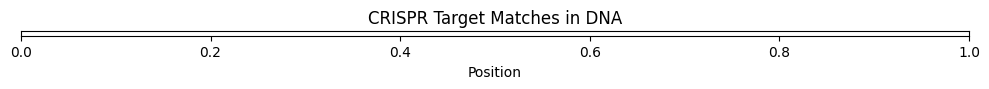

In [7]:
positions = [pos for pos, _ in hits]

plt.figure(figsize=(10, 1))
plt.eventplot(positions, orientation='horizontal', color='red', linewidths=5)
plt.title("CRISPR Target Matches in DNA")
plt.xlabel("Position")
plt.yticks([])
plt.tight_layout()
plt.savefig("guide_match_plot.png")
plt.show()

## Section 5: Biological Notes

- Cas9 requires a PAM sequence (typically NGG) immediately after the target site.
- Mismatches between the guide RNA and DNA can reduce or eliminate binding.
- Off-target binding is a major concern in gene editing, especially in repetitive or GC-rich regions.
- Guide RNA design tools often use algorithms to predict off-target risk.

This simulation assumes perfect matching. Real tools account for:
- Mismatch tolerance
- Bulges or gaps
- Genome-wide off-target scanning